In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
%config Completer.use_jedi = False

In [13]:
def get_fitness_df(df):
    fitness_col = [col for col in df if col.startswith('fitness')]
    df_fitness = df[fitness_col]
    return df_fitness

def get_time_df(df):
    fitness_col = [col for col in df if col.startswith('time')]
    df_fitness = df[fitness_col]
    return df_fitness

def get_fevals_df(df):
    fitness_col = [col for col in df if col.startswith('fevals')]
    df_fitness = df[fitness_col]
    return df_fitness

def plot_fitness(df_fitness, names={}, title="", save_as=None):        
    # Plot
    plt.title(title)
    plt.xlabel("Iterations")
    plt.ylabel("Fitness") 
    
    for name, label in names.items():
        plt.plot(df_fitness.index, df_fitness["fitness_" + name], label=label)
        
    plt.legend()
    plt.grid()
    
    if save_as:
        plt.savefig('images/'+save_as)
    
    plt.show()

def plot_time(df_fitness, names={}, title=""):        
    # Plot
    plt.title(title)
    plt.xlabel("Iterations")
    plt.ylabel("Time") 
    
    for name, label in names.items():
        plt.plot(df_fitness.index, df_fitness["time_" + name], label=label)
        
    plt.legend()
    plt.grid()
    plt.show()
    
def plot_fevals(df_fitness, names={}, title=""):        
    # Plot
    plt.title(title)
    plt.xlabel("Iterations")
    plt.ylabel("Function Evals") 
    
    for name, label in names.items():
        plt.plot(df_fitness.index, df_fitness["fevals_" + name], label=label)
        
    plt.legend()
    plt.grid()
    plt.show()
    
def combine_csv(problem, names={}):
    # read first file so we can get indexes
    _first_file_name = list(names.keys())[0]
    df_read = pd.read_csv("ABAGAIL/jython/data/" + problem + "/"+ _first_file_name +".csv")
    df = pd.DataFrame(index = df_read["iters"])
    
    for name in names.keys():
        df_read = pd.read_csv("ABAGAIL/jython/data/"+ problem + "/" + name +".csv", index_col = "iters")
        df_read = df_read.add_suffix("_" + name)

        df = df.join(df_read)
        
    df.ffill(inplace= True)
    return df

In [45]:
def plot_max_fitness_bar(combined_df, names, title="", save_as=None, plot=True):
    x_labels = []
    y_values = []
    
    for name, label in names.items():
        max_fitness_index = combined_df["fitness_" + name].argmax()
        row = combined_df.iloc[max_fitness_index]
        max_fitness_value = row["fitness_" + name]
        fevals_to_max_fitness = row["fevals_" + name]
        
        x_labels.append(label)
        y_values.append(max_fitness_value)
        
        print(label, "max_fitness=",max_fitness_value, "iterations=",max_fitness_index, "fevals=",fevals_to_max_fitness)
        
    
    if plot:
        plt.title(title)
        plt.ylabel("Fitness Score")
        plt.ylabel("Algorithm") 
        plt.bar(x_labels, y_values)
        plt.show()
    
    if save_as:
        plt.savefig('images/'+save_as)


In [34]:
def plot_max_time_bar(combined_df, names, title="", save_as=None, plot=True):
    x_labels = []
    y_values = []
    
    for name, label in names.items():
        max_fitness_index = combined_df["fitness_" + name].argmax()
        row = combined_df.iloc[max_fitness_index]
        max_time_value = row["time_" + name]
        
        x_labels.append(label)
        y_values.append(max_time_value)
        
        print(label, max_time_value)
        
    if plot:
        plt.title(title)
        plt.ylabel("Time (Seconds)")
        plt.ylabel("Algorithm") 
        bars = plt.bar(x_labels, y_values)
    
        # Set bar color
        for bar in bars:
            bar.set_color('green')
            
        plt.show()
        
    if save_as:
        plt.savefig('images/'+save_as)

In [43]:
def plot_max_fevals_bar(combined_df, names, title="", save_as=None, plot=True):
    x_labels = []
    y_values = []
    
    for name, label in names.items():
        max_fitness_index = combined_df["fevals_" + name].argmax()
        row = combined_df.iloc[max_fitness_index]
        max_fitness_value = row["fevals_" + name]
        
        x_labels.append(label)
        y_values.append(max_fitness_value)
        
        print(label, "max_fevals=",max_fitness_value, "iterations=",max_fitness_index)
        
    
    if plot:
        plt.title(title)
        plt.ylabel("Fitness Score")
        plt.ylabel("Algorithm") 
        plt.bar(x_labels, y_values)
        plt.show()
    
    if save_as:
        plt.savefig('images/'+save_as)


# Tune RHC

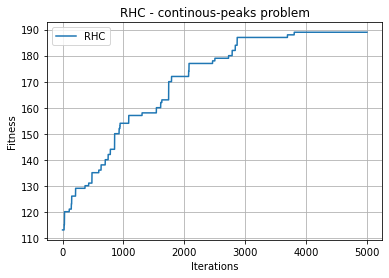

In [60]:
files = {
    "exp01-RHC-0"    : "RHC",
}

df_test = combine_csv("continous-peaks", files)

ft_df = get_fitness_df(df_test)

fe_df = get_fevals_df(df_test)
t_df = get_time_df(df_test)

# ft_df
plot_fitness(ft_df[:5000], files, title="RHC - continous-peaks problem", save_as="cp/1")

In [46]:
plot_max_fitness_bar(df_test[:5000], files, title="", plot=False)

0 max_fitness= 189.0 iterations= 3805 fevals= 4058.0


In [42]:
plot_max_time_bar(df_test[:5000], files, title="", plot=False)

0 0.4179999828338623


# Tune SA

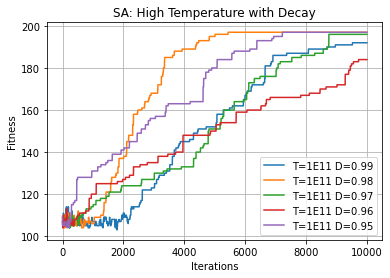

In [61]:
files = {
    "exp00-SA-0"    : "T=1E11 D=0.99",
    "exp00-SA-1"    : "T=1E11 D=0.98",
    "exp00-SA-2"    : "T=1E11 D=0.97",
    "exp00-SA-3"    : "T=1E11 D=0.96",
    "exp00-SA-4"    : "T=1E11 D=0.95",
#     "exp00-SA-5"    : "5",
}

df_test = combine_csv("continous-peaks", files)

ft_df = get_fitness_df(df_test)

fe_df = get_fevals_df(df_test)
t_df = get_time_df(df_test)

# ft_df
plot_fitness(ft_df[:10000], files, title="SA: High Temperature with Decay", save_as="cp/2")

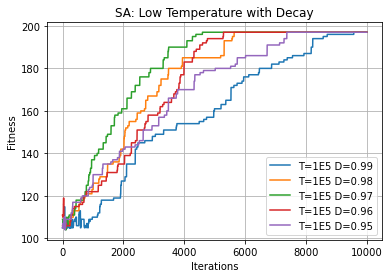

In [62]:
files = {
    "exp00-SA-6"    : "T=1E5 D=0.99",
    "exp00-SA-7"    : "T=1E5 D=0.98",
    "exp00-SA-8"    : "T=1E5 D=0.97",
    "exp00-SA-9"    : "T=1E5 D=0.96",
    "exp00-SA-10"   : "T=1E5 D=0.95",
#     "exp00-SA-11"    : "5",
}

df_test = combine_csv("continous-peaks", files)

ft_df = get_fitness_df(df_test)

fe_df = get_fevals_df(df_test)
t_df = get_time_df(df_test)

# ft_df
plot_fitness(ft_df[:10000], files, title="SA: Low Temperature with Decay", save_as="cp/3")

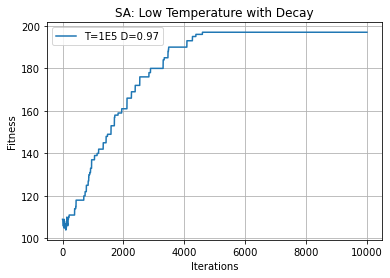

In [63]:
files = {
    "exp00-SA-8"    : "T=1E5 D=0.97",
}

df_test = combine_csv("continous-peaks", files)

ft_df = get_fitness_df(df_test)

fe_df = get_fevals_df(df_test)
t_df = get_time_df(df_test)

# ft_df
plot_fitness(ft_df[:10000], files, title="SA: Low Temperature with Decay")

In [64]:
plot_max_fitness_bar(df_test[:5000], files, title="", plot=False)

T=1E5 D=0.97 max_fitness= 197.0 iterations= 4594 fevals= 4851.0


In [65]:
plot_max_time_bar(df_test[:5000], files, title="", plot=False)

T=1E5 D=0.97 0.059999942779541016


# Tune GA

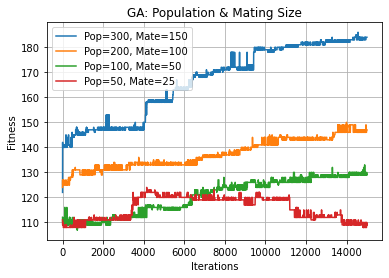

In [86]:
files = {
    "exp02-GA-1"    : "Pop=300, Mate=150",
    "exp02-GA-2"    : "Pop=200, Mate=100",
    "exp02-GA-3"    : "Pop=100, Mate=50",
    "exp02-GA-4"    : "Pop=50, Mate=25",
}

df_test = combine_csv("continous-peaks", files)

ft_df = get_fitness_df(df_test)

fe_df = get_fevals_df(df_test)
t_df = get_time_df(df_test)

# ft_df
plot_fitness(ft_df[:15000], files, title="GA: Population & Mating Size", save_as="cp/ga_01")

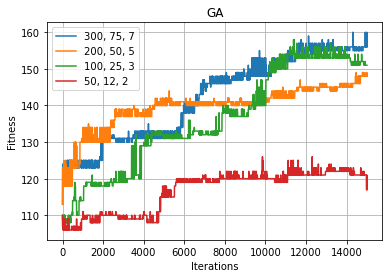

In [81]:
files = {
#     "exp02-GA-5"    : "500, 125, 12",
    "exp02-GA-6"    : "300, 75, 7",
    "exp02-GA-7"    : "200, 50, 5",
    "exp02-GA-8"    : "100, 25, 3",
    "exp02-GA-9"    : "50, 12, 2",
}

df_test = combine_csv("continous-peaks", files)

ft_df = get_fitness_df(df_test)

fe_df = get_fevals_df(df_test)
t_df = get_time_df(df_test)

# ft_df
plot_fitness(ft_df[:15000], files, title="GA")

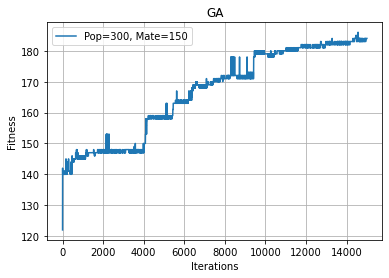

In [89]:
files = {
    "exp02-GA-1"    : "Pop=300, Mate=150",
}

df_test = combine_csv("continous-peaks", files)

ft_df = get_fitness_df(df_test)

fe_df = get_fevals_df(df_test)
t_df = get_time_df(df_test)

# ft_df
plot_fitness(ft_df[:15000], files, title="GA")

In [92]:
plot_max_fitness_bar(df_test[:15000], files, title="", plot=False)

Pop=300, Mate=150 max_fitness= 186.0 iterations= 14563 fevals= 2369426.0


In [93]:
plot_max_time_bar(df_test[:15000], files, title="", plot=False)

Pop=300, Mate=150 3.174000024795532


# Tune MIMIC

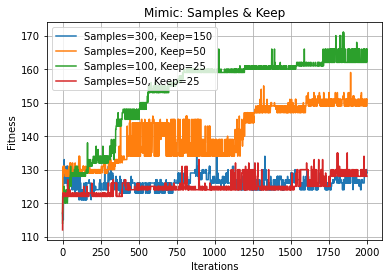

In [104]:
files = {
    "exp03-MIMIC-0"    : "Samples=300, Keep=150",
#     "exp03-MIMIC-1"    : "1",
#     "exp03-MIMIC-2"    : "2",
    "exp03-MIMIC-3"    : "Samples=200, Keep=50",
#     "exp03-MIMIC-4"    : "4",
    "exp03-MIMIC-5"    : "Samples=100, Keep=25",
    "exp03-MIMIC-6"    : "Samples=50, Keep=25",
}

df_test = combine_csv("continous-peaks", files)

ft_df = get_fitness_df(df_test)

fe_df = get_fevals_df(df_test)
t_df = get_time_df(df_test)

# ft_df
plot_fitness(ft_df[:10000], files, title="Mimic: Samples & Keep", save_as="cp/mimic_01")

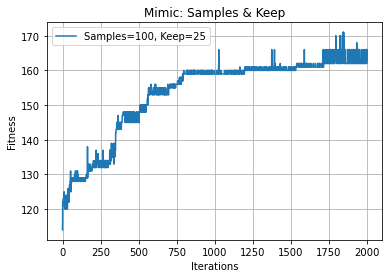

In [105]:
files = {
    "exp03-MIMIC-5"    : "Samples=100, Keep=25",
}

df_test = combine_csv("continous-peaks", files)

ft_df = get_fitness_df(df_test)

fe_df = get_fevals_df(df_test)
t_df = get_time_df(df_test)

# ft_df
plot_fitness(ft_df[:10000], files, title="Mimic: Samples & Keep")

In [106]:
plot_max_fitness_bar(df_test[:2000], files, title="", plot=False)

Samples=100, Keep=25 max_fitness= 171.0 iterations= 1842 fevals= 393800.0


In [107]:
plot_max_time_bar(df_test[:2000], files, title="", plot=False)

Samples=100, Keep=25 13.717999935150145


# N=100

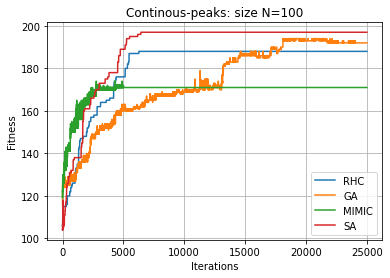

In [148]:
files = {
    "exp04-RHC-N=100"   : "RHC",
    "exp04-GA-N=100"    : "GA",
    "exp04-MIMIC-N=100" : "MIMIC",
    "exp04-SA-N=100"    : "SA",
}

df_test = combine_csv("continous-peaks", files)

ft_df = get_fitness_df(df_test)

fe_df = get_fevals_df(df_test)
t_df = get_time_df(df_test)

# ft_df
plot_fitness(ft_df[:25000], files, title="Continous-peaks: size N=100", save_as="cp/N100")

In [146]:
plot_max_fitness_bar(df_test[:25000], files, title="Best Fitness", plot=False)

RHC max_fitness= 188.0 iterations= 6261 fevals= 6512.0
GA max_fitness= 194.0 iterations= 18123 fevals= 2929208.0
MIMIC max_fitness= 174.0 iterations= 2773 fevals= 580100.0
SA max_fitness= 197.0 iterations= 6428 fevals= 6685.0


In [147]:
plot_max_time_bar(df_test[:25000], files, title="Wallclock time", save_as="N100 time.png", plot=False)

RHC 0.5299999713897705
GA 5.246000051498413
MIMIC 19.633000135421753
SA 0.2260000705718994


<Figure size 432x288 with 0 Axes>

# N=50

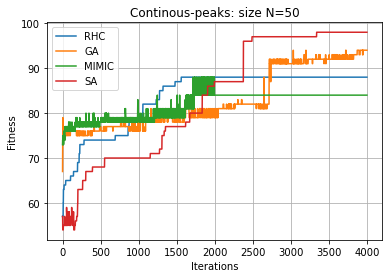

In [149]:
files = {
    "exp05-RHC-N=50"   : "RHC",
    "exp05-GA-N=50"    : "GA",
    "exp05-MIMIC-N=50" : "MIMIC",
    "exp05-SA-N=50"    : "SA",
}

df_test = combine_csv("continous-peaks", files)

ft_df = get_fitness_df(df_test)

fe_df = get_fevals_df(df_test)
t_df = get_time_df(df_test)

# ft_df
plot_fitness(ft_df[:4000], files, title="Continous-peaks: size N=50", save_as="cp/N50")

In [132]:
plot_max_fitness_bar(df_test[:4000], files, title="Best Fitness", plot=False)

RHC max_fitness= 88.0 iterations= 1559 fevals= 1813.0
GA max_fitness= 94.0 iterations= 3032 fevals= 554771.0
MIMIC max_fitness= 88.0 iterations= 1712 fevals= 367900.0
SA max_fitness= 98.0 iterations= 3338 fevals= 3599.0


In [133]:
plot_max_time_bar(df_test[:4000], files, title="Wallclock time", save_as="N100 time.png", plot=False)

RHC 0.05200004577636719
GA 0.6800000667572021
MIMIC 5.22599983215332
SA 0.05699992179870605


<Figure size 432x288 with 0 Axes>

# N=200

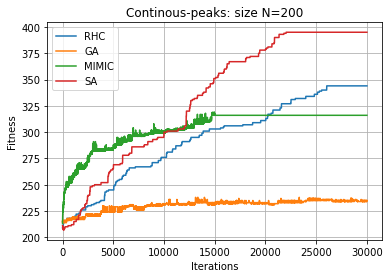

In [150]:
files = {
    "exp06-RHC-N=200"   : "RHC",
    "exp06-GA-N=200"    : "GA",
    "exp06-MIMIC-N=200" : "MIMIC",
    "exp06-SA-N=200"    : "SA",
}

df_test = combine_csv("continous-peaks", files)

ft_df = get_fitness_df(df_test)

fe_df = get_fevals_df(df_test)
t_df = get_time_df(df_test)

# ft_df
plot_fitness(ft_df[:30000], files, title="Continous-peaks: size N=200", save_as="cp/N200")

In [143]:
plot_max_fitness_bar(df_test[:30000], files, title="Best Fitness", plot=False)

RHC max_fitness= 344.0 iterations= 26032 fevals= 26283.0
GA max_fitness= 238.0 iterations= 13114 fevals= 2139958.0
MIMIC max_fitness= 319.0 iterations= 14769 fevals= 2979700.0
SA max_fitness= 395.0 iterations= 22031 fevals= 22285.0


In [144]:
plot_max_time_bar(df_test[:30000], files, title="Wallclock time", save_as="N100 time.png", plot=False)

RHC 0.20000004768371585
GA 7.2189998626708975
MIMIC 322.6829998493194
SA 0.2899999618530273


<Figure size 432x288 with 0 Axes>